<a href="https://colab.research.google.com/github/fabishevskiy/traffic_analysis/blob/main/%22%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82_%D0%BF%D0%B0%D1%81%D1%81%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%BF%D0%BE%D1%82%D0%BE%D0%BA%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

**Расчет пассажиропотока для подбора количества, параметров и размеров лифтов**

Настоящий анализ основан на расчетном методе в соответствие с ГОСТ 34758-2021 ЛИФТЫ. Определение числа, параметров и размеров лифтов для зданий различного назначения


Критерии для расчетного метода анализа

Расчетный метод анализа основан на условиях пикового пассажиропотока вверх (входящий пассажиропоток). При этом основной посадочный этаж находится внизу здания, все верхние этажи заселены равномерно (п.5.4.1, ГОСТ 34758-2021).

Критериями для расчетного метода анализа являются:

а) расчетный пассажиропоток;  
б) нормативный интервал движения лифтов;  
в) нормативное время движения лифта на всю высоту подъема.

Рекомендуемые значения вышеуказанных критериев приведены в таблицах 1 и 4, ГОСТ 34758-2021.



# Подготовка к расчетам

In [ ]:
# импорт библиотек
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# зададим константные значения
T_5 = 5*60        # время для расчета 5 минутного интервала = 300 сек
LIFT_ACCEL = 1.0  # ускорение/земедление лифта



## Исходные данные

Выведем информацию по зданию:
1. Тип здания
2. Нормативный интервал движения
3. Расчетный пассажиропоток
4. Общая заселенность здания

In [ ]:
# Зададим рекомендуемые критерии для зданий в зависимости от назначения согласно таблице 1, ГОСТ 34758-2021
building_types = ['Офис', 'Гостиница', 'Жилое здание']

# нормативный интервал движения лифтов / Required uppeak interval
t_int_req = {
    'Офис': 30,
    'Гостиница': 40,
    'Жилое здание': 60,
}

# Нормативный пассажиропоток / Required uppeak handling capacity
C_h_req = {
    'Офис': 12,
    'Гостиница': 12,
    'Жилое здание': 6
}
t_H_min = 20 # минимальное рекомендуемое время движения лифта на всю высоты подъема
t_H_max = 30 # максимальное рекомендуемое время движения лифта на всю высоты подъема

## Характеристики по зданию


In [ ]:
building_type = building_types[0]

# интервал движения лифтов и пассажиропоток для выбранного типа здания
t_int = t_int_req[building_type] # требуемый интервал движения
A_capacity = C_h_req[building_type] # пассажиропоток

print(f'Для типа здания {building_type}: \n- нормативный интервал: <= {t_int}, с.; \n- расчетный пассажиропоток: >= {A_capacity}% населения здания за 5 мин')

Для типа здания Офис: 
- нормативный интервал: <= 30, с.; 
- расчетный пассажиропоток: >= 12% населения здания за 5 мин


In [ ]:
# исходные данных по исследуемому зданию
U = 1092 # общая заселенность здания / Population per building rise
D = 52 # высота подъема лифта / travel distance to highest severed floor
d_f = 4.0 # расстояние между этажами, м; / average interfloor height
N = 13 # количество обслуживаемых этажей выше основного посадочного / number of landings served above entrance floor


print(f'Общая заселенность здания {U} человек, \nВысота подъема лифта {D} метров \nРасстояние между этажами {d_f} метров, \nКоличество обслуживаемых этажей выше основной этажной площадки - {N} этажей')

Общая заселенность здания 1092 человек, 
Высота подъема лифта 52 метров 
Расстояние между этажами 4.0 метров, 
Количество обслуживаемых этажей выше основной этажной площадки - 13 этажей


# Расчеты

## Количество людей, которых необходимо перевезти за 5 мин.

In [ ]:

C_h = U * A_capacity/100 #провозная способность лифтов за 5 мин, чел.;
print(f'При общей заселенности здания {U} чел., за 5 минут необходимо перевезти {U} x {A_capacity} = {C_h} человек')

При общей заселенности здания 1092 чел., за 5 минут необходимо перевезти 1092 x 12 = 131.04 человек


## Количество отправлений лифтов с основного посадочного этажа  
Разделим 5-минутный интервал (в секундах) на рекомендуемый интервал движения лифтов.

In [ ]:
# расчет количества отправлений за 5 минут
round_trips_quantity = math.ceil(T_5 / t_int)
print(f'Для обеспечения требуемого интервала {t_int} с число отправлений должно быть не менее {round_trips_quantity}')

Для обеспечения требуемого интервала 30 с число отправлений должно быть не менее 10


## Средняя загрузка кабины  
Высчислим среднюю загрузку кабины, для чего разделим количество человек, перевозимых за 5 минут, на количество рейсов.

In [ ]:
P_calc = C_h / round_trips_quantity # Расчетная средняя загрузка кабины
print(f'Средняя загрузка кабины лифта {P_calc:.2f} человек')

Средняя загрузка кабины лифта 13.10 человек


## Скорость лифтов

In [ ]:
v_p_max = D / t_H_min
v_p_min = D / t_H_max
print(f'Скорость лифтов должна быть от {v_p_min:.1f}  м/с до {v_p_max:.1f} м/с')

Скорость лифтов должна быть от 1.7  м/с до 2.6 м/с


In [ ]:
v_n = 2.5 #м/с - номинальная скорость лифтов
print(f'Примем номинальную скорость лифтов равной - {v_n} с')

Примем номинальную скорость лифтов равной - 2.5 с


In [ ]:
t_D = D / v_n # - время подъема лифта на всю высоту
print(f'Время подъема лифта на всю высоту - {t_D} с')

Время подъема лифта на всю высоту - 20.8 с


## Время, затрачиваемое на остановку  
Рассчитаем время, затрачиваемое на остановку по формуле (9) ГОСТ 34758-2021 / формула (14) ISO 8100-32-2020:  
$t_{s} = t_{c} + t_{sd} + t_{f}(1) - t_{pre} + t_{0} - t_{v}$

In [ ]:
t_c = 2.4 # время закрывания двери, с;  / closing time
t_o = 2.0 # время открывания двери, с; / opening time
t_sd = 0.6 # время задержки начала движения, с; / start delay time
t_f1 = 5.1 # время движения лифта между соседними этажами с учетом стадии разгона и торможения; / flight time
t_pre = 0 # время предварительного открывания двери, с; / pre-opening time
t_cd = 2.0 # время задержки закрывания двери, с; / closing delay time
t_v = d_f / v_n # время движения лифта между соседними этажами на номинальной скорости, с; / travel berween two floor at rated speed (s)

t_p = 0.9 # время на вход пассажира в лифт - из табл.3 ГОСТ 34758-2021

t_s = t_c + t_sd + t_f1 -t_pre + t_o + t_cd - t_v # время затрачиваемое на остановку
print(f'Время, затрачиваемое на остановку - {t_s} с')

Время, затрачиваемое на остановку - 10.5 с


## Средний этаж реверса  
Определим средний номер этажа реверса при круговом рейсе :  
$ H = N - \sum_{i=1}^{N-1}{(\frac{i}{N})^{P_{calc}}} $

In [ ]:
# определим формулу для расчета этажа реверса
def av_highest_reversal_floor(N, P_calc):
    sum = 0
    for i in range(1, N):
        sum += (i/N)**P_calc
    return N - sum # Номер этажа реверса при круговом рейсе

In [ ]:
# определим этажа реверса
h_rev = av_highest_reversal_floor(N, P_calc)
print(f'Средний номер этажа реверса - {h_rev:.2f} ')

Средний номер этажа реверса - 12.50 


## Вероятное число остановок  
Определим вероятное число остановок при равномерной заселенности этажей :  
$ S = N[1-(1-\frac{1}{N})^{P_{calc}}] $

In [ ]:
S = N * (1 - (1 - 1 / N)**P_calc)
print(f'Вероятное число остановок - {S:.2f} ')

Вероятное число остановок - 8.45 


Время кругового рейса рассчитывают по формуле (7):  
$ t_{rt} = 2 \times H \times t_{v} + (S+1) \times t_{s} + 2 \times P_{calc} \times t_{p}$

In [ ]:
t_rt = 2*h_rev*t_v + (S+1)*t_s + 2*P_calc*t_p
print(f'Время кругового рейса - {t_rt:.2f} ')

Время кругового рейса - 162.75 


## Выбор количества лифтов

Для определения количества лифтов поделим время кругового рейса на требуемый интервал и округлим получившееся значение до целого вверх

In [ ]:
L = math.ceil(t_rt / t_int)
print(f'Необходимое минимальное количество лифтов - {L} ')

Необходимое минимальное количество лифтов - 6 


## Интервал движения лифтов  
Определим интервал движения для данного количества лифтов по формуле:  
$ t_{int} = t_{rt} / L $

In [ ]:
t_int = t_rt / L
print(f'Интервал движения лифтов - {t_int:.2f} с')

Интервал движения лифтов - 27.13 с


## Количество пассажиров, перевозимых за 5 минут:

In [ ]:
С_h = (T_5 * P_calc) / t_int
print(f'количество пассажиров, перевозимых за 5 минут: {С_h:.1f}')

количество пассажиров, перевозимых за 5 минут: 144.9


## Процент населения здания, перевозимого за 5 мин:

In [ ]:
C_h_percent = С_h / U * 100
print(f'процент населения здания, перевозимого за 5 мин: {C_h_percent:.1f}%')

процент населения здания, перевозимого за 5 мин: 13.3%


## Вывод  

Таким образом,обеспечивается необходимый расчетный критерий, приведенный в таблице 1, $\geq 12\% $

# Зависимость интервала движения лифтов от пассажиропотока для выбранных лифтов

## Зададим интервал пассажиропотока от 3% до 8%  
В СП 267.1325800.2016, Приложение Д, таблица Д.1 приведены характеристики качества обслуживания лифта: Провозная способность лифтов и соответствующий интервал.


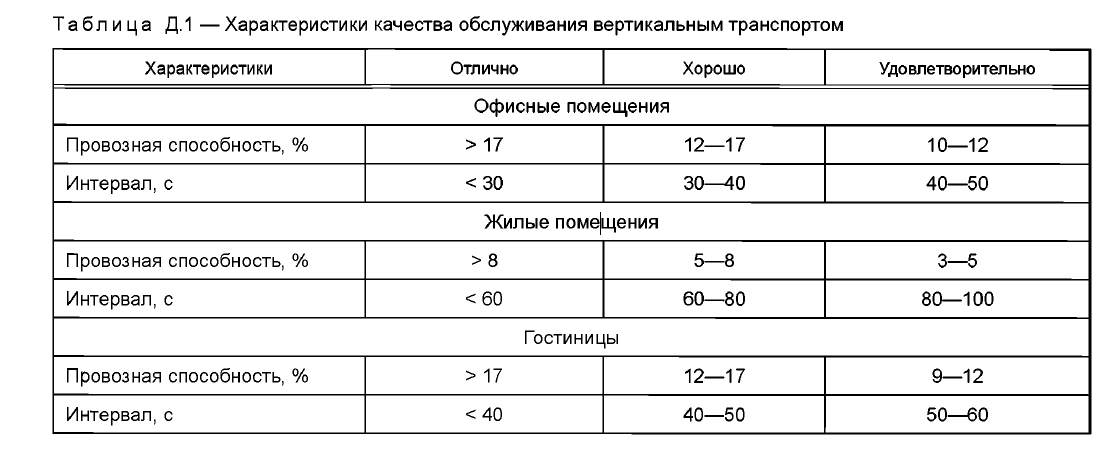

In [ ]:
traffic_range = list(np.arange(3, 8.1, 0.5))
df = pd.DataFrame(traffic_range, columns=['traffic'])

# Вычислим интервал движения
#Добавим информацию по интервалу движения для каждого из значений процента пассажиропотока.

def interval_calc(traffic):
    interval = traffic**0.2 * 3
    return interval

def load_cald(traffic):
    load = traffic *1.1
    return load


df['interval'] = interval_calc(df['traffic'])
df['cabin_load'] = df['traffic'].map(load_cald)
print(df)
#df.plot()

In [ ]:
# зададим коэффициент загрузки кабины
cabin_load = list(np.arange(0.1, 1.1, 0.1))
df = pd.DataFrame(cabin_load, columns=['cabin_load'])

# Вычислим интервал движения
#Добавим информацию по интервалу движения для каждого из значений процента пассажиропотока.
df['reverce_floor'] = av_highest_reversal_floor(N, df['cabin_load'])
df[''] = N * (1 - (1 - 1 / N)**P_calc)

def interval_calc(traffic):
    nomer_etazha_reversa =
    interval = traffic**0.2 * 3
    return interval

def load_cald(traffic):
    load = traffic *1.1
    return load


df['interval'] = interval_calc(df['traffic'])
df['cabin_load'] = df['traffic'].map(load_cald)
print(df)
#df.plot()



    traffic  interval  cabin_load
0       3.0  3.737193        3.30
1       3.5  3.854205        3.85
2       4.0  3.958524        4.40
3       4.5  4.052880        4.95
4       5.0  4.139189        5.50
5       5.5  4.218847        6.05
6       6.0  4.292907        6.60
7       6.5  4.362183        7.15
8       7.0  4.427319        7.70
9       7.5  4.488834        8.25
10      8.0  4.547150        8.80


## График зависимости интервала от пассажиропотока

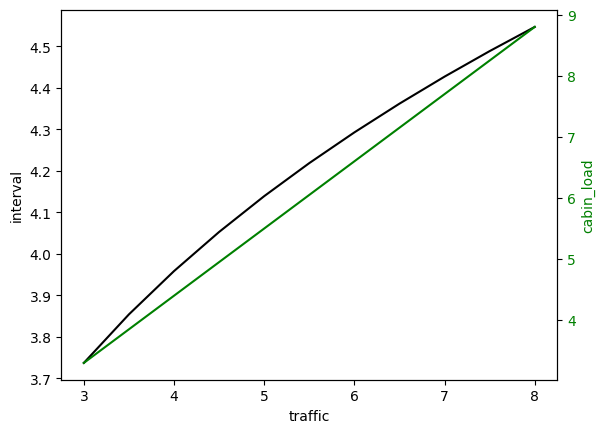

In [ ]:
# Define Data
x = df['traffic']
data_1 = df['interval']
data_2 = df['cabin_load']

# Create Plot
fig, ax1 = plt.subplots()

ax1.set_xlabel('traffic')
ax1.set_ylabel('interval', color = 'black')
plot_1 = ax1.plot(x, data_1, color = 'black')
ax1.tick_params(axis ='y', labelcolor = 'black')

# Adding Twin Axes
ax2 = ax1.twinx()

ax2.set_ylabel('cabin_load', color = 'green')
plot_2 = ax2.plot(x, data_2, color = 'green')
ax2.tick_params(axis ='y', labelcolor = 'green')

# Show plot

plt.show()